<h1>Import The required libraries</h1>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

<h2>Changing directory to our specified location</h2>

In [2]:
os.chdir("E:\courses\IBM ML Internship\Datasets\Bitcoin prize prediction")

<h2>Reading Datasets from our directory</h2>

In [3]:
Df1=pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv")
Df2=pd.read_csv("coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv")

<h2>Checking shapes of datasets</h2>

In [4]:
print("DataFrame 1 -  ",Df1.shape)
print("--------------------------------------------")
print("DataFrame 2 -  ",Df2.shape)

DataFrame 1 -   (3997697, 8)
--------------------------------------------
DataFrame 2 -   (2099760, 8)


<h2>Checking info of datasets</h2>

In [5]:
Df1.info()
print("--------------------------------------------")
Df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3997697 entries, 0 to 3997696
Data columns (total 8 columns):
Timestamp            int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7), int64(1)
memory usage: 244.0 MB
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099760 entries, 0 to 2099759
Data columns (total 8 columns):
Timestamp            int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7), int64(1)
memory usage: 128.2 MB


# Data cleaning

<h3>Removing Timestamp column as it is of no use for our work</h3>

In [6]:
Df1=Df1.drop('Timestamp',axis=1)

In [7]:
Df2=Df2.drop('Timestamp',axis=1)

In [8]:
Df1.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
Df2.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Checking for Null Values using Heatmap

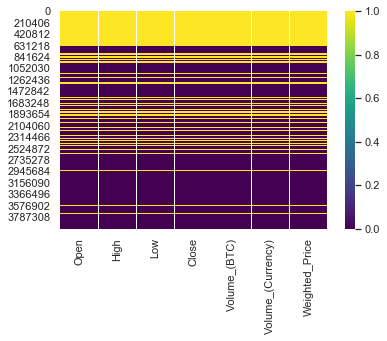

In [73]:
sns.heatmap(Df1.isnull(),cmap='viridis')

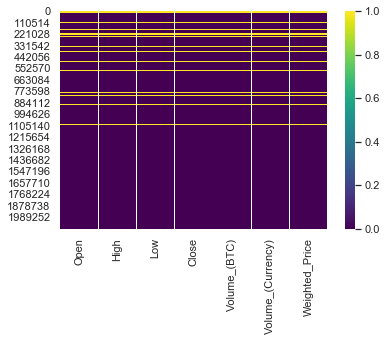

In [74]:
sns.heatmap(Df2.isnull(),cmap='viridis')

In [10]:
Df1.isnull().head(10)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,False,False,False,False,False,False,False
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True


In [11]:
Df2.isnull().head(10)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,False,False,False,False,False,False,False
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True
7,False,False,False,False,False,False,False
8,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True


# <h2>Conclusions from above :-</h2>

<h4> From Above heatmap and table, we can see that the both dataset contains null values, hence it is good practice to remove those records as the number of rows is very large, we can consider this records to be deleted.
</h4>

<h3>Deleting Records which has null values - </h3>

In [370]:
newdf1=Df1.dropna(how='all')

In [372]:
newdf2=Df2.dropna(how='all')

In [373]:
newdf1.head(10)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
1896,4.84,4.84,4.84,4.84,10.000000,48.400000,4.840000
2333,5.00,5.00,5.00,5.00,10.100000,50.500000,5.000000
3612,5.00,5.00,5.00,5.00,19.048000,95.240000,5.000000
4553,5.32,5.32,5.32,5.32,2.419173,12.870000,5.320000
4710,5.14,5.14,5.14,5.14,0.680000,3.495200,5.140000


In [374]:
newdf2.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0
7,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0
51,370.0,370.0,370.0,370.0,0.010000,3.70000,370.0
77,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0
1436,377.0,377.0,377.0,377.0,0.010000,3.77000,377.0


# <h4>Now we will Look how much rows we have lost by dropping null entries.</h4>

In [375]:
print("Total Number of Rows Deleted from Dataset 1 are - ",Df1.shape[0] - newdf1.shape[0])

Total Number of Rows Deleted from Dataset 1 are -  1231878


In [376]:
print("Total Number of Rows Deleted from Dataset 2 are - ",Df2.shape[0] - newdf2.shape[0])

Total Number of Rows Deleted from Dataset 2 are -  109069


In [377]:
newdf1.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [378]:
newdf2.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

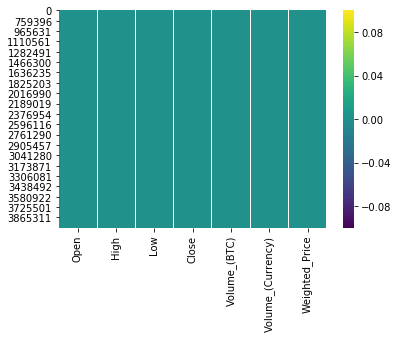

In [20]:
sns.heatmap(newdf1.isnull(),cmap='viridis')

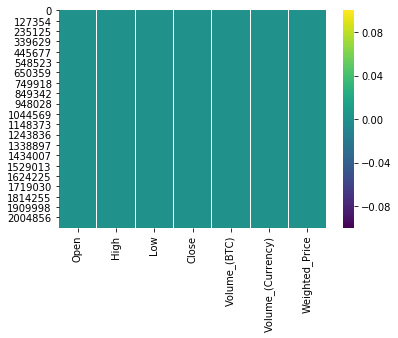

In [21]:
sns.heatmap(newdf2.isnull(),cmap='viridis')

# <h2>Conclusion :</h2>   <h4> After Deleting the null values we can see that there are no null records exists in our new datasets namely newdf1 and newdf2. we can continue with visualizations from now.</h4>

# Visualizing Dataset

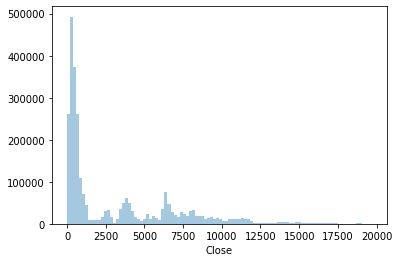

In [22]:
sns.distplot(newdf1['Close'],kde=False,bins=100)

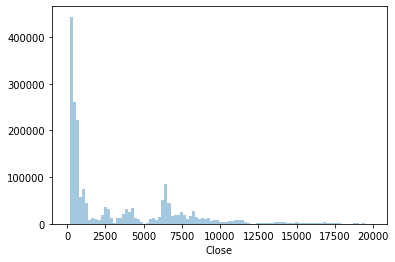

In [23]:
sns.distplot(newdf2['Close'],kde=False,bins=100)

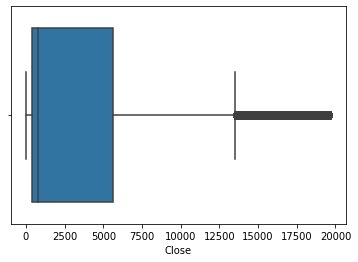

In [24]:
sns.boxplot(newdf1['Close'],orient='h')

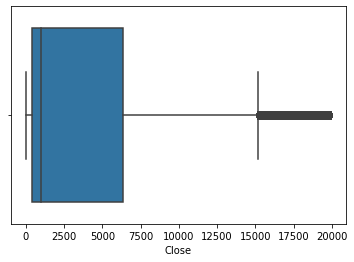

In [25]:
sns.boxplot(newdf2['Close'],orient='h')

<h3>Plotting the rolling 30 day average against the Close Price</h3>

C:\Users\Nilkanth kulkarni\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Nilkanth kulkarni\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


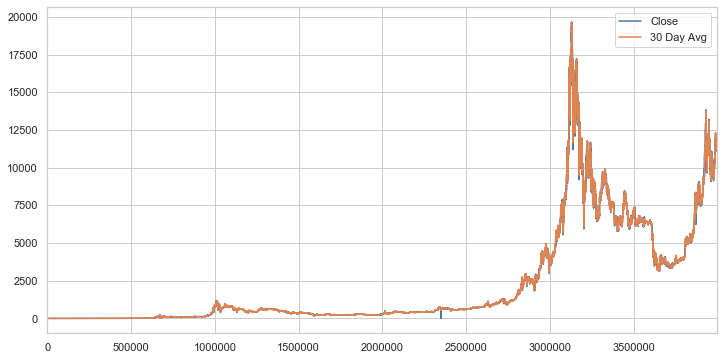

In [26]:
sns.set()
sns.set_style('whitegrid')
newdf1['Close'].plot(figsize=(12,6),label='Close')
newdf1['Close'].rolling(window=30).mean().plot(label='30 Day Avg')# Plotting the 
#rolling 30 day average against the Close Price
plt.legend()

C:\Users\Nilkanth kulkarni\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Nilkanth kulkarni\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


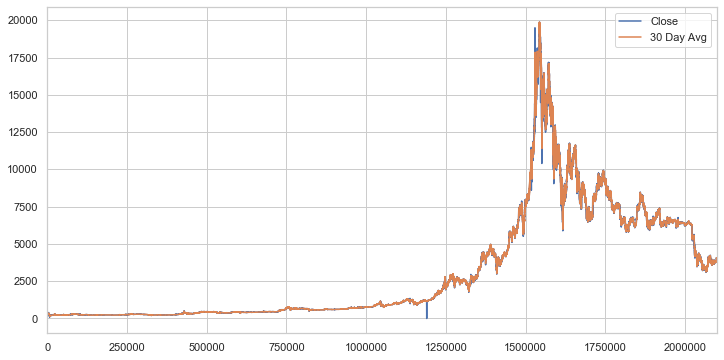

In [28]:
sns.set()
sns.set_style('whitegrid')
newdf2['Close'].plot(figsize=(12,6),label='Close')
newdf2['Close'].rolling(window=30).mean().plot(label='30 Day Avg')# Plotting the 
#rolling 30 day average against the Close Price
plt.legend()

<h4>Adding new feature to improve Accuracy</h4>

In [379]:
newdf1['ohlc_average'] = (newdf1['Open'] + newdf1['High'] + newdf1['Low'] + newdf1['Close']) /4

C:\Users\Nilkanth kulkarni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [380]:
newdf1.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,ohlc_average
0,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,4.390
478,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,4.390
547,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,4.535
548,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,4.580
1224,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,4.580


In [381]:
newdf2['ohlc_average'] = (newdf2['Open'] + newdf2['High'] + newdf2['Low'] + newdf2['Close']) /4

C:\Users\Nilkanth kulkarni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [382]:
newdf2.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,ohlc_average
0,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0,300.0
7,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0,300.0
51,370.0,370.0,370.0,370.0,0.010000,3.70000,370.0,370.0
77,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0,370.0
1436,377.0,377.0,377.0,377.0,0.010000,3.77000,377.0,377.0


In [383]:
newdf1['Price_After_Month']=newdf1['Close'].shift(-30)

C:\Users\Nilkanth kulkarni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [384]:
newdf2['Price_After_Month']=newdf2['Close'].shift(-30)

C:\Users\Nilkanth kulkarni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [385]:
newdf2.tail(31)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,ohlc_average,Price_After_Month
2099729,4011.51,4011.51,4011.50,4011.50,0.618715,2481.976711,4011.504804,4011.5050,4005.99
2099730,4011.51,4011.51,4011.50,4011.51,4.800442,19257.017170,4011.508983,4011.5075,NaN
2099731,4011.51,4011.51,4011.50,4011.50,2.564290,10286.657789,4011.503219,4011.5050,NaN
2099732,4011.51,4013.45,4011.50,4013.45,12.323814,49446.144604,4012.243570,4012.4775,NaN
2099733,4013.45,4015.00,4013.44,4015.00,13.981753,56123.805701,4014.075072,4014.2225,NaN
2099734,4015.00,4016.50,4015.00,4015.80,3.749535,15057.021696,4015.703679,4015.5750,NaN
2099735,4015.80,4015.80,4015.79,4015.79,1.856575,7455.632556,4015.799068,4015.7950,NaN
2099736,4015.80,4015.80,4015.79,4015.79,3.935866,15805.631118,4015.794631,4015.7950,NaN
2099737,4015.80,4015.80,4013.18,4014.64,14.744987,59208.462922,4015.497845,4014.8550,NaN
2099738,4014.65,4018.30,4014.64,4018.05,10.469356,42054.587908,4016.922240,4016.4100,NaN


In [232]:
newdf1.drop(['Volume_(BTC)','Volume_(Currency)','Weighted_Price'],axis=1,inplace=True)

C:\Users\Nilkanth kulkarni\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [386]:
newdf1.tail(31)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,ohlc_average,Price_After_Month
3997666,11516.00,11525.00,11516.00,11525.00,1.118883,12885.625422,11516.509389,11520.5000,11520.0
3997667,11525.00,11532.11,11496.79,11504.84,29.196789,336153.864640,11513.384837,11514.6850,NaN
3997668,11506.83,11506.83,11506.83,11506.83,0.022696,261.163156,11506.830000,11506.8300,NaN
3997669,11508.67,11510.43,11498.74,11498.74,5.393892,62085.156759,11510.270561,11504.1450,NaN
3997670,11517.73,11525.37,11517.73,11525.37,0.415343,4784.035332,11518.264964,11521.5500,NaN
3997671,11525.37,11525.37,11504.74,11514.93,5.482086,63135.383551,11516.670945,11517.6025,NaN
3997672,11520.34,11520.34,11520.34,11520.34,0.558979,6439.627902,11520.340000,11520.3400,NaN
3997673,11520.31,11520.31,11508.49,11508.49,0.140438,1616.506321,11510.457497,11514.4000,NaN
3997674,11514.01,11514.01,11514.01,11514.01,0.354032,4076.332709,11514.010000,11514.0100,NaN
3997675,11520.36,11520.36,11512.01,11512.01,0.049529,570.398243,11516.342869,11516.1850,NaN


In [388]:
newdf2.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,ohlc_average,Price_After_Month
2099755,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309,4006.1475,NaN
2099756,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083169,4006.017233,4006.1475,NaN
2099757,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635,4006.0075,NaN
2099758,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991,4005.7550,NaN
2099759,4005.51,4006.01,4005.51,4005.99,1.752778,7021.183546,4005.745614,4005.7550,NaN


In [389]:
newdf2.drop(['Volume_(BTC)','Volume_(Currency)','Weighted_Price'],axis=1,inplace=True)

C:\Users\Nilkanth kulkarni\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [390]:
newdf2.head()

,Open,High,Low,Close,ohlc_average,Price_After_Month
0,300.0,300.0,300.0,300.0,300.0,344.67
7,300.0,300.0,300.0,300.0,300.0,305.38
51,370.0,370.0,370.0,370.0,370.0,270.35
77,370.0,370.0,370.0,370.0,370.0,345.44
1436,377.0,377.0,377.0,377.0,377.0,295.38


In [391]:
newdf2.tail()

,Open,High,Low,Close,ohlc_average,Price_After_Month
2099755,4006.01,4006.57,4006.00,4006.01,4006.1475,NaN
2099756,4006.01,4006.57,4006.00,4006.01,4006.1475,NaN
2099757,4006.01,4006.01,4006.00,4006.01,4006.0075,NaN
2099758,4006.01,4006.01,4005.50,4005.50,4005.7550,NaN
2099759,4005.51,4006.01,4005.51,4005.99,4005.7550,NaN


 <h2>Now we will start with Preprocessing of Data</h2>

In [115]:
newdf1.dropna(inplace=True)
X1=newdf1.drop('Price_After_Month',axis=1)


C:\Users\Nilkanth kulkarni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
X1=X1.iloc[:500000,:]

In [117]:
X1.shape

(500000, 5)

In [118]:
X1=preprocessing.scale(X1)#We need to scale our values to input them in our model
y1=newdf1['Price_After_Month']
y1=y1.iloc[:500000]

In [119]:
y1.shape

(500000,)

In [120]:
newdf2.dropna(inplace=True)
X2=newdf2.drop('Price_After_Month',axis=1)
X2=X2.iloc[:500000,:]
X2=preprocessing.scale(X2)#We need to scale our values to input them in our model
y2=newdf2['Price_After_Month']
y2=y2.iloc[:500000]

C:\Users\Nilkanth kulkarni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<h3>Now we will use train_test_split fuction to split our data into training set and testing set.</h3>

In [121]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.3,random_state=101)

In [122]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.3,random_state=101)

In [125]:
reg = tree.DecisionTreeRegressor()
reg.fit(X_test1,y_test1)
accuracy=reg.score(X_test1,y_test1)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')#This percentage shows how much our regression fits our data'

Accuracy is: 99.9981 %


In [113]:
X_train1=X_train1.iloc[:100000,:]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [128]:
reg1=RandomForestRegressor(n_estimators=100,random_state=101)
reg1.fit(X_train1,y_train1)
accuracy1=reg1.score(X_test1,y_test1)
accuracy1=accuracy1*100
accuracy1 = float("{0:.4f}".format(accuracy1))
print('Accuracy is:',accuracy1,'%')#This percentage shows how much our regression fits our data

Accuracy is: 99.9563 %


In [129]:
preds = reg1.predict(X_test1)
print("The prediction is:",preds[2],"But the real value is:" ,y_test1.iloc[2])


The prediction is: 138.97069999999982 But the real value is: 141.61


In [112]:
reg2=RandomForestRegressor(n_estimators=100,random_state=101)
reg2.fit(X_train2,y_train2)
accuracy2=reg2.score(X_test2,y_test2)
accuracy2=accuracy2*100
accuracy2 = float("{0:.4f}".format(accuracy2))
print('Accuracy is:',accuracy2,'%')#This percentage shows how much our regression fits our data

Accuracy is: 99.8853 %


In [130]:
preds2 = reg2.predict(X_test2)
print("The prediction is:",preds2[2],"But the real value is:" ,y_test2.iloc[2])


The prediction is: 252.61365809523812 But the real value is: 252.31


In [132]:
print("The prediction is:",preds2[11],"But the real value is:" ,y_test2.iloc[11])

The prediction is: 225.22643527777757 But the real value is: 225.31


<h3>We'll take the last 30 elements to make our predictions on them</h3>

In [88]:
X_30=X1[-30:]
forecast=reg1.predict(X_30)

In [342]:
X2_30=X2[-30:]
forecast2=reg2.predict(X2_30)

<h4>we will get the index position from our original datasets</h4>

In [271]:
last_date=newdf1.iloc[-1].name
last_date

3997696

In [280]:
indexeslst=list()
for i in range(3997696,3997726):
    indexeslst.append(i+1)

In [393]:
ssd=pd.DataFrame(forecast,columns=['forecast'],index=indexeslst)

In [394]:
newdf1=newdf1.append(ssd,sort=False)

<h2>Final Visualizations for bitstampUSD_1-min_data 30 days prize predictions </h2>

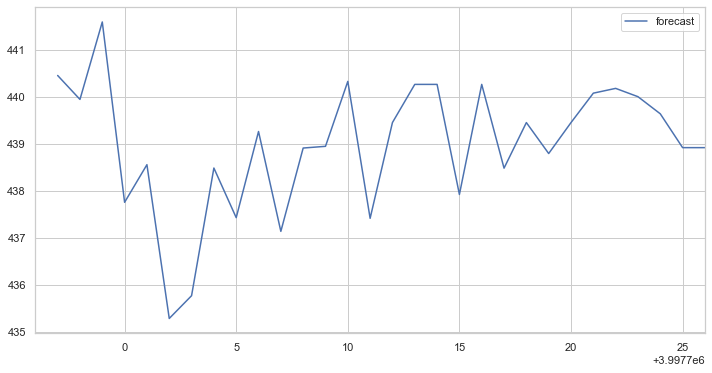

In [397]:
newdf1['forecast'].tail(31).plot(figsize=(12,6),label='forecast')
plt.legend()

<h4>For 2nd Dataset</h4>

In [346]:
last_date2=newdf2.iloc[-1].name
last_date2

2099759

In [360]:
indexeslst2=list()
for i in range(2099759,2099789):
    indexeslst2.append(i+1)

In [361]:
print(indexeslst2)

[2099760, 2099761, 2099762, 2099763, 2099764, 2099765, 2099766, 2099767, 2099768, 2099769, 2099770, 2099771, 2099772, 2099773, 2099774, 2099775, 2099776, 2099777, 2099778, 2099779, 2099780, 2099781, 2099782, 2099783, 2099784, 2099785, 2099786, 2099787, 2099788, 2099789]


In [362]:
newdf4=newdf2.copy()

In [363]:
ssd2=pd.DataFrame(forecast2,columns=['forecast'],index=indexeslst2)

In [366]:
newdf4=newdf4.append(ssd2,sort=False)

In [367]:
newdf4.tail()

,Open,High,Low,Close,ohlc_average,Price_After_Month,forecast
2099785,NaN,NaN,NaN,NaN,NaN,NaN,405.161455
2099786,NaN,NaN,NaN,NaN,NaN,NaN,401.067358
2099787,NaN,NaN,NaN,NaN,NaN,NaN,406.766480
2099788,NaN,NaN,NaN,NaN,NaN,NaN,407.802600
2099789,NaN,NaN,NaN,NaN,NaN,NaN,407.014000


<h2>Final Visualizations for coinbaseUSD_1-min_data 30 days prize predictions </h2>

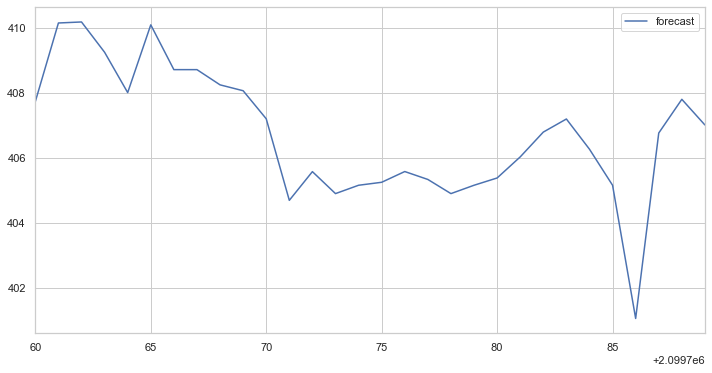

In [399]:
newdf4['forecast'].tail(30).plot(figsize=(12,6),label='forecast')
plt.legend()

<h1>Thank You....!</h1>